In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.metrics
from ann import ann
import ann_utils
import gd
import train_utils
import maps

In [2]:
epochs = 10

ann.num_layers = 5
ann.hidden_size = 128
ann.weight_decay = 0
ann.learning_rate = 0.001

optimizer = gd.adam
ann.batch_size = 64
ann.weight_init = ann_utils.xavier_init
ann.activation = ann_utils.tanh
ann.d_activation = ann_utils.d_tanh

In [3]:
## Prepare data.

from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Meta information about the data.
n_train = len(y_train.flatten())
n_test = len(y_test.flatten())
input_dim = len(X_train[0].flatten())
output_dim = 10

# Split train data to train and validation sets.
ind = [i for i in range(n_train)]
np.random.shuffle(ind)
m = int(n_train * 0.1)
X_valid = X_train[ind[1: m]]
y_valid = y_train[ind[1: m]]
X_train = X_train[ind[m:]]
y_train = y_train[ind[m:]]



2023-03-19 22:03:38.340255: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-19 22:03:38.465732: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-19 22:03:38.465755: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-19 22:03:39.071517: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [4]:
nn = ann(input_dim, output_dim)
optimizer(nn, X_train, y_train, epochs)

In [8]:
print(train_utils.get_loss(nn, X_valid, y_valid))
print(train_utils.get_classification_accuracy(nn, X_valid, y_valid))
print(train_utils.get_loss(nn, X_test, y_test))
print(train_utils.get_classification_accuracy(nn, X_test, y_test))

1.0164875427223858
0.6786131021836973
1.0487049730898041
0.6629


In [12]:
y_pred = np.zeros(y_test.shape)
for i in range(len(y_test)):
    y_pred[i] = nn.predict(X_test[i])

In [21]:
confusion_mat = sklearn.metrics.confusion_matrix(y_test, y_pred)
print(confusion_mat)

[[796   2   0 123  26   1  32   0  19   1]
 [ 21 848   0 105  10   0  14   0   2   0]
 [ 40   1   0  17 587   0 327   0  27   1]
 [ 63  11   0 833  62   0  28   0   3   0]
 [  3   0   0  71 852   0  60   0  14   0]
 [  0   1   0   2   0 373   0 254  60 310]
 [257   0   1  75 405   0 212   0  50   0]
 [  0   0   0   0   0  36   0 844  14 106]
 [ 12   1   0  13  12   0   8   8 945   1]
 [  0   0   0   3   0   3   0  54  14 926]]


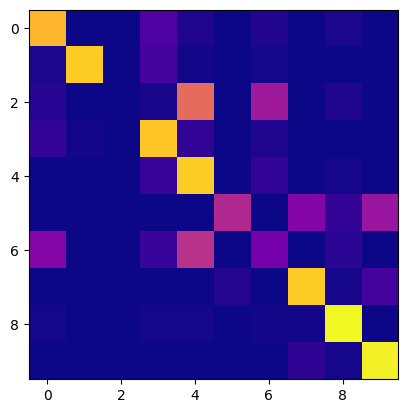

In [25]:
plt.imshow(confusion_mat, cmap='plasma')
plt.savefig('../confusion_mat.png')

In [26]:
import wandb
wandb.login()
wandb.init(project='cs6910-Assignment-1')
wandb.log({"Confusion_Matrix": wandb.Image('../confusion_mat.png')})

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: cs22m068 (cs6910-cs22m068). Use `wandb login --relogin` to force relogin
